In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import datetime
%matplotlib inline

In [2]:
f = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2015.nc', 'a')

In [3]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [4]:
mask = mesh.variables['e3t_0'][:,:22,:,:]

In [5]:
mask = np.ma.masked_array(mask, mask = 1- mesh.variables['tmask'][:,:22,:,:])

In [6]:
averaged = np.sum((f.variables['votemper'][:] * mask), axis=1) / np.sum(mask, axis = 1)
averaged.shape

(4, 898, 398)

In [7]:
temps = f.createVariable('votemperoverdepth', 'f4', ('time_counter', 'y', 'x'))

In [8]:
temps[:] = averaged

In [9]:
sals = f.createVariable('vosalineoverdepth', 'f4', ('time_counter', 'y', 'x'))

In [10]:
averaged2 = np.sum((f.variables['vosaline'][:] * mask), axis=1) / np.sum(mask, axis = 1)
averaged2.shape

(4, 898, 398)

In [11]:
sals[:] = averaged2

In [12]:
f.variables['vosalineoverdepth']

<class 'netCDF4._netCDF4.Variable'>
float32 vosalineoverdepth(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (4, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

In [13]:
f.variables['votemperoverdepth']

<class 'netCDF4._netCDF4.Variable'>
float32 votemperoverdepth(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (4, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

In [14]:
f.close()

In [42]:
f = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2015.nc')

In [43]:
f.variables.keys()

odict_keys(['bounds_lat', 'bounds_lon', 'deptht', 'deptht_bounds', 'nav_lat', 'nav_lon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'votemper', 'votemperoverdepth', 'vosalineoverdepth'])

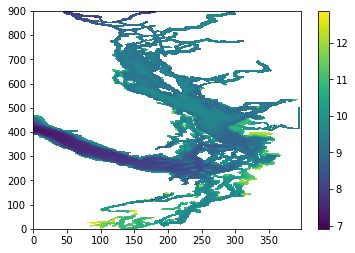

In [40]:
plt.pcolormesh(f.variables['deep_T'][0,...], 
                                  )
plt.colorbar()

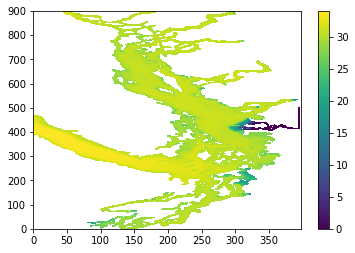

In [41]:
plt.pcolormesh(f.variables['deep_S'][0,...], 
                                 )
plt.colorbar()

In [29]:
f = nc.Dataset('/home/vdo/Downloads/rivers_month_201702.nc')

In [31]:
f.variables.keys()

odict_keys(['nav_lat', 'nav_lon', 'area', 'time_counter', 'rorunoff', 'rodepth'])